<table align="center">
  <td>
    <a href="https://colab.research.google.com/github/BUFONJOKER/mobile_dataset_analysis/blob/master/mobiles_dataset_cleaning.ipynb" target="_parent">
      <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"
      style="height:50px; width:auto;"/>
    </a>
  </td>
</table>


# Mobile Dataset Cleaning for Analysis

---

### 📋 Dataset Description
<small>

The dataset contains detailed information about various smartphones, including their specifications, prices across multiple countries, and launch details.  
Below is an explanation of each column:

| **Column Name** | **Description** |
|------------------|-----------------|
| **Company Name** | The brand or manufacturer of the mobile phone (e.g., Samsung, Apple, Xiaomi, OnePlus). This helps in identifying brand-level trends and comparisons. |
| **Model Name** | The specific model or variant of the phone released by the company (e.g., iPhone 14 Pro, Galaxy S23 Ultra). Useful for product-level analysis. |
| **Mobile Weight** | The weight of the mobile phone measured in grams (g). Can be used to analyze correlations between device weight and battery size or screen dimensions. |
| **RAM** | The Random Access Memory of the phone in gigabytes (GB). Higher RAM generally indicates better multitasking and performance capabilities. |
| **Front Camera** | The megapixel (MP) value of the front/selfie camera. Important for analyzing photography and selfie performance trends. |
| **Back Camera** | The megapixel (MP) value of the rear/main camera setup. Often affects pricing and marketing strategy of smartphones. |
| **Processor** | The chipset or processor model used in the phone (e.g., Snapdragon 8 Gen 2, Apple A17 Bionic). Critical for performance and pricing analysis. |
| **Battery Capacity** | The total battery power capacity in milliampere-hours (mAh). Indicates potential battery life and endurance of the device. |
| **Screen Size** | The diagonal screen size measured in inches. Larger screen sizes often correlate with higher prices and heavier devices. |
| **Launched Price (Pakistan)** | The official launch price of the phone in **USD (Pakistan region equivalent)**. Used for regional price comparison. |
| **Launched Price (India)** | The launch price of the phone in **USD (Indian market equivalent)**. Useful for market analysis and currency-based comparison. |
| **Launched Price (China)** | The launch price in **USD (Chinese market equivalent)**. Helpful in understanding regional pricing differences. |
| **Launched Price (USA)** | The official launch price in **USD (U.S. market)**. Often serves as a baseline for global price comparison. |
| **Launched Price (Dubai)** | The launch price of the phone in **USD (Dubai market equivalent)**. Reflects Middle Eastern market pricing trends. |
| **Launched Year** | The year when the phone was officially released. Useful for tracking price evolution, technology improvements, and product lifecycle analysis. |

</small>

---


In [162]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [163]:
# load the dataset
# df = pd.read_csv("/content/Mobiles Dataset (2025).csv", encoding='ISO-8859-1')
df_copy = pd.read_csv("dataset/Mobiles Dataset (2025).csv", encoding='ISO-8859-1')
df = df_copy.copy()

In [164]:
# display the first few rows of the dataset
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [165]:
# check the data types of each column
df.dtypes

Company Name                 object
Model Name                   object
Mobile Weight                object
RAM                          object
Front Camera                 object
Back Camera                  object
Processor                    object
Battery Capacity             object
Screen Size                  object
Launched Price (Pakistan)    object
Launched Price (India)       object
Launched Price (China)       object
Launched Price (USA)         object
Launched Price (Dubai)       object
Launched Year                 int64
dtype: object

In [166]:
# display the column names
df.columns

Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Launched Year'],
      dtype='object')

In [167]:
# Rename columns to include units where applicable
df.rename(columns={
    'Mobile Weight': 'Mobile Weight (gram)',
    'RAM': 'RAM (GB)',
    'Front Camera': 'Front Camera (MP)',
    'Back Camera': 'Back Camera (MP)',
    'Battery Capacity': 'Battery Capacity (mAh)',
    'Screen Size': 'Screen Size (inch)',
    'Launched Price (Pakistan)': 'Launched Price (Pakistan USD)',
    'Launched Price (India)': 'Launched Price (India USD)',
    'Launched Price (China)': 'Launched Price (China USD)',
    'Launched Price (USA)': 'Launched Price (USA USD)',
    'Launched Price (Dubai)': 'Launched Price (Dubai USD)'
},inplace=True)

In [168]:
# Check for missing values
df.isnull().sum()

Company Name                     0
Model Name                       0
Mobile Weight (gram)             0
RAM (GB)                         0
Front Camera (MP)                0
Back Camera (MP)                 0
Processor                        0
Battery Capacity (mAh)           0
Screen Size (inch)               0
Launched Price (Pakistan USD)    0
Launched Price (India USD)       0
Launched Price (China USD)       0
Launched Price (USA USD)         0
Launched Price (Dubai USD)       0
Launched Year                    0
dtype: int64

In [169]:
# Check for duplicate rows
df[df.duplicated()]

,Company Name,Model Name,Mobile Weight (gram),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inch),Launched Price (Pakistan USD),Launched Price (India USD),Launched Price (China USD),Launched Price (USA USD),Launched Price (Dubai USD),Launched Year
347,Oppo,A3 128GB,186g,4GB,5MP,50MP,Snapdragon 6s 4G Gen 1,5000mAh,6.7 inches,"PKR 59,999","INR 34,999","CNY 2,999",USD 399,"AED 1,499",2024
437,Oppo,K11x 128GB,195g,8GB,16MP,108MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.72 inches,"PKR 59,999","INR 18,000","CNY 1,499",USD 199,"AED 1,000",2023
438,Oppo,K11x 256GB,195g,12GB,16MP,108MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.72 inches,"PKR 64,999","INR 20,000","CNY 1,699",USD 229,"AED 1,200",2023
441,Oppo,K10x 128GB,195g,6GB,16MP,64MP + 2MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.59 inches,"PKR 54,999","INR 16,990","CNY 1,499",USD 199,"AED 1,000",2022
442,Oppo,K10x 256GB,195g,8GB,16MP,64MP + 2MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.59 inches,"PKR 59,999","INR 18,990","CNY 1,699",USD 229,"AED 1,200",2022
443,Oppo,K10 5G 128GB,205g,8GB,16MP,64MP + 8MP + 2MP,MediaTek Dimensity 8000-Max,"5,000mAh",6.59 inches,"PKR 64,999","INR 19,999","CNY 1,799",USD 249,"AED 1,300",2022
445,Oppo,K9x 128GB,194g,6GB,16MP,64MP + 2MP + 2MP,MediaTek Dimensity 810,"5,000mAh",6.5 inches,"PKR 49,999","INR 15,999","CNY 1,499",USD 199,"AED 1,000",2021
446,Oppo,K9x 256GB,194g,8GB,16MP,64MP + 2MP + 2MP,MediaTek Dimensity 810,"5,000mAh",6.5 inches,"PKR 54,999","INR 17,999","CNY 1,699",USD 229,"AED 1,200",2021
447,Oppo,K9 Pro 5G 128GB,180g,8GB,16MP,64MP + 8MP + 2MP,MediaTek Dimensity 1200,"4,500mAh",6.43 inches,"PKR 69,999","INR 24,999","CNY 2,199",USD 299,"AED 1,500",2021
448,Oppo,K9 Pro 5G 256GB,180g,12GB,16MP,64MP + 8MP + 2MP,MediaTek Dimensity 1200,"4,500mAh",6.43 inches,"PKR 74,999","INR 27,999","CNY 2,499",USD 329,"AED 1,700",2021


In [170]:
# Display all duplicate rows with keep=False
# keep=False marks all duplicates as True
df[df.duplicated(keep=False)]

,Company Name,Model Name,Mobile Weight (gram),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inch),Launched Price (Pakistan USD),Launched Price (India USD),Launched Price (China USD),Launched Price (USA USD),Launched Price (Dubai USD),Launched Year
344,Oppo,A3 128GB,186g,4GB,5MP,50MP,Snapdragon 6s 4G Gen 1,5000mAh,6.7 inches,"PKR 59,999","INR 34,999","CNY 2,999",USD 399,"AED 1,499",2024
347,Oppo,A3 128GB,186g,4GB,5MP,50MP,Snapdragon 6s 4G Gen 1,5000mAh,6.7 inches,"PKR 59,999","INR 34,999","CNY 2,999",USD 399,"AED 1,499",2024
423,Oppo,K11x 128GB,195g,8GB,16MP,108MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.72 inches,"PKR 59,999","INR 18,000","CNY 1,499",USD 199,"AED 1,000",2023
424,Oppo,K11x 256GB,195g,12GB,16MP,108MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.72 inches,"PKR 64,999","INR 20,000","CNY 1,699",USD 229,"AED 1,200",2023
425,Oppo,K10x 128GB,195g,6GB,16MP,64MP + 2MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.59 inches,"PKR 54,999","INR 16,990","CNY 1,499",USD 199,"AED 1,000",2022
426,Oppo,K10x 256GB,195g,8GB,16MP,64MP + 2MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.59 inches,"PKR 59,999","INR 18,990","CNY 1,699",USD 229,"AED 1,200",2022
427,Oppo,K10 5G 128GB,205g,8GB,16MP,64MP + 8MP + 2MP,MediaTek Dimensity 8000-Max,"5,000mAh",6.59 inches,"PKR 64,999","INR 19,999","CNY 1,799",USD 249,"AED 1,300",2022
428,Oppo,K9x 128GB,194g,6GB,16MP,64MP + 2MP + 2MP,MediaTek Dimensity 810,"5,000mAh",6.5 inches,"PKR 49,999","INR 15,999","CNY 1,499",USD 199,"AED 1,000",2021
429,Oppo,K9x 256GB,194g,8GB,16MP,64MP + 2MP + 2MP,MediaTek Dimensity 810,"5,000mAh",6.5 inches,"PKR 54,999","INR 17,999","CNY 1,699",USD 229,"AED 1,200",2021
430,Oppo,K9 Pro 5G 128GB,180g,8GB,16MP,64MP + 8MP + 2MP,MediaTek Dimensity 1200,"4,500mAh",6.43 inches,"PKR 69,999","INR 24,999","CNY 2,199",USD 299,"AED 1,500",2021


In [171]:
# Remove duplicate rows
df.drop_duplicates(keep=False,inplace=True)

In [172]:
# Verify removal of duplicates
df.duplicated().sum()

np.int64(0)

In [173]:
# display the first few rows of the dataset
df.head()

,Company Name,Model Name,Mobile Weight (gram),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inch),Launched Price (Pakistan USD),Launched Price (India USD),Launched Price (China USD),Launched Price (USA USD),Launched Price (Dubai USD),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [174]:
# Clean 'Mobile Weight (gram)' column by removing 'g' suffix
df['Mobile Weight (gram)'] = df['Mobile Weight (gram)'].apply(lambda x: x.replace('g',''))

In [175]:
# Check the unique values in 'Mobile Weight (gram)' column
df['Mobile Weight (gram)'].value_counts()

Mobile Weight (gram)
190      68
195      54
185      29
192      26
198      22
         ..
288       1
495       1
505       1
475       1
178.8     1
Name: count, Length: 148, dtype: int64

In [176]:
# Convert 'Mobile Weight (gram)' column to numeric type
df['Mobile Weight (gram)'] = pd.to_numeric(df['Mobile Weight (gram)'], errors='coerce')

In [177]:
# Check the unique values in 'Mobile Weight (gram)' column
df['Mobile Weight (gram)'].value_counts()

Mobile Weight (gram)
190.0    68
195.0    54
185.0    29
192.0    26
198.0    22
         ..
288.0     1
495.0     1
505.0     1
475.0     1
178.8     1
Name: count, Length: 148, dtype: int64

In [178]:
# Clean 'RAM (GB)' column by removing 'GB' suffix
df['RAM (GB)'] = df['RAM (GB)'].apply(lambda x:x.replace('GB',''))

In [179]:
# Convert 'RAM (GB)' column to numeric type
df['RAM (GB)'] = pd.to_numeric(df['RAM (GB)'], errors='coerce')

In [180]:
# Check the unique values in 'RAM (GB)' column
df['RAM (GB)'].value_counts()

RAM (GB)
8.0     292
6.0     200
12.0    189
4.0     144
3.0      32
16.0     31
2.0       6
1.5       2
10.0      1
1.0       1
Name: count, dtype: int64

In [181]:
# Check the unique values in 'Battery Capacity (mAh)' column
df['Battery Capacity (mAh)'].value_counts()

Battery Capacity (mAh)
5,000mAh    179
5000mAh      94
4,500mAh     42
4500mAh      38
5,200mAh     35
           ... 
7,500mAh      1
8,300mAh      1
8,850mAh      1
5065mAh       1
5110mAh       1
Name: count, Length: 147, dtype: int64

In [182]:
# Clean 'Battery Capacity (mAh)' column by removing 'mAh' suffix
df['Battery Capacity (mAh)'] = df['Battery Capacity (mAh)'].apply(lambda x:x.replace('mAh',''))

In [183]:
# check a specific value
df.loc[925, 'Battery Capacity (mAh)']

'10,000'

In [184]:
# Find entries with spaces in 'Battery Capacity (mAh)' column
df[df['Battery Capacity (mAh)'].str.contains(' ')]

,Company Name,Model Name,Mobile Weight (gram),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inch),Launched Price (Pakistan USD),Launched Price (India USD),Launched Price (China USD),Launched Price (USA USD),Launched Price (Dubai USD),Launched Year


In [185]:
# Clean 'Battery Capacity (mAh)' column by removing commas and stripping spaces
df['Battery Capacity (mAh)'] = (
    df['Battery Capacity (mAh)']
    .astype(str)
    .str.replace(',','' ,regex=False)
    .str.strip()
)
df['Battery Capacity (mAh)'] = pd.to_numeric(df['Battery Capacity (mAh)'], errors='coerce')

In [186]:
# Check for null values in 'Battery Capacity (mAh)' column after cleaning
df['Battery Capacity (mAh)'].isnull().sum()

np.int64(0)

In [187]:
# Clean 'Screen Size (inch)' column by removing 'inches' suffix and extra text
df['Screen Size (inch)'] = (
    df['Screen Size (inch)']
    .astype(str)
    .str.replace(r'inches.*','',regex=True)
    .str.strip()
)
df['Screen Size (inch)'] = pd.to_numeric(df['Screen Size (inch)'], errors='coerce')

In [188]:
# Check for null values in 'Screen Size (inch)' column after cleaning
df['Screen Size (inch)'].isnull().sum()

np.int64(0)

In [189]:
# Clean 'Launched Price (Pakistan USD)' column by removing 'PKR' and commas
df['Launched Price (Pakistan USD)'] =(
    df['Launched Price (Pakistan USD)']
    .astype(str)
    .str.replace('PKR','',regex=False)
    .str.replace(',','',regex=False)
    .str.strip()
)

In [190]:
# Convert 'Launched Price (Pakistan USD)' column to numeric type
df['Launched Price (Pakistan USD)'] = pd.to_numeric(df['Launched Price (Pakistan USD)'],errors='coerce')

In [191]:
# Check for null values in 'Launched Price (Pakistan USD)' column after cleaning
df['Launched Price (Pakistan USD)'].isnull().sum()

np.int64(1)

In [192]:
# Remove rows with null values in 'Launched Price (Pakistan USD)' column
df.dropna(subset=['Launched Price (Pakistan USD)'],inplace=True)

In [193]:
# Check for null values in 'Launched Price (Pakistan USD)' column after cleaning
df['Launched Price (Pakistan USD)'].isnull().sum()

np.int64(0)

In [194]:
# display the column names
df.columns

Index(['Company Name', 'Model Name', 'Mobile Weight (gram)', 'RAM (GB)',
       'Front Camera (MP)', 'Back Camera (MP)', 'Processor',
       'Battery Capacity (mAh)', 'Screen Size (inch)',
       'Launched Price (Pakistan USD)', 'Launched Price (India USD)',
       'Launched Price (China USD)', 'Launched Price (USA USD)',
       'Launched Price (Dubai USD)', 'Launched Year'],
      dtype='object')

In [195]:
# Clean 'Launched Price (India USD)' column by removing 'INR' and commas
df['Launched Price (India USD)'] = (
    df['Launched Price (India USD)']
    .astype(str)
    .str.replace('INR','',regex=False)
    .str.replace(',','',regex=False)
    .str.strip()
)
df['Launched Price (India USD)'] = pd.to_numeric(df['Launched Price (India USD)'], errors='coerce')

In [196]:
# Clean 'Launched Price (China USD)' column by removing 'CNY', '¥' and commas
df['Launched Price (China USD)'] = (
    df['Launched Price (China USD)']
    .astype(str)
    .str.replace('CNY','',regex=False)
    .str.replace('¥','',regex=False)
    .str.replace(',','',regex=False)
    .str.strip()
)
df['Launched Price (China USD)'] = pd.to_numeric(df['Launched Price (China USD)'], errors='coerce')

In [197]:
# Clean 'Launched Price (USA USD)' column by removing 'USD' and commas
df['Launched Price (USA USD)'] = (
    df['Launched Price (USA USD)']
    .astype(str)
    .str.replace('USD','',regex=False)
    .str.replace(',','',regex=False)
    .str.strip()
)
df['Launched Price (USA USD)'] = pd.to_numeric(df['Launched Price (USA USD)'], errors='coerce')

In [198]:
# Clean 'Launched Price (Dubai USD)' column by removing 'AED' and commas
df['Launched Price (Dubai USD)'] = (
    df['Launched Price (Dubai USD)']
    .astype(str)
    .str.replace('AED','',regex=False)
    .str.replace(',','',regex=False)
    .str.strip()
)
df['Launched Price (Dubai USD)'] = pd.to_numeric(df['Launched Price (Dubai USD)'], errors='coerce')

In [199]:
# check the data types of each column
df.dtypes

Company Name                      object
Model Name                        object
Mobile Weight (gram)             float64
RAM (GB)                         float64
Front Camera (MP)                 object
Back Camera (MP)                  object
Processor                         object
Battery Capacity (mAh)             int64
Screen Size (inch)               float64
Launched Price (Pakistan USD)    float64
Launched Price (India USD)         int64
Launched Price (China USD)         int64
Launched Price (USA USD)         float64
Launched Price (Dubai USD)         int64
Launched Year                      int64
dtype: object

In [200]:
# Convert launched prices to USD using approximate conversion rates
columns = {
    'Launched Price (Pakistan USD)':281,
    'Launched Price (India USD)':87.82,
    'Launched Price (China USD)':7.12,
    'Launched Price (Dubai USD)':3.67
}

for key, val in columns.items():
    df[key] //= val

In [201]:
# Check for null values in the entire dataframe
print(df.isnull().sum())

Company Name                     0
Model Name                       0
Mobile Weight (gram)             0
RAM (GB)                         2
Front Camera (MP)                0
Back Camera (MP)                 0
Processor                        0
Battery Capacity (mAh)           0
Screen Size (inch)               0
Launched Price (Pakistan USD)    0
Launched Price (India USD)       0
Launched Price (China USD)       0
Launched Price (USA USD)         0
Launched Price (Dubai USD)       0
Launched Year                    0
dtype: int64


In [202]:
# Remove rows with any null values in the dataframe
df.dropna(inplace=True)

In [203]:
# Check for missing values
df.isnull().sum()

Company Name                     0
Model Name                       0
Mobile Weight (gram)             0
RAM (GB)                         0
Front Camera (MP)                0
Back Camera (MP)                 0
Processor                        0
Battery Capacity (mAh)           0
Screen Size (inch)               0
Launched Price (Pakistan USD)    0
Launched Price (India USD)       0
Launched Price (China USD)       0
Launched Price (USA USD)         0
Launched Price (Dubai USD)       0
Launched Year                    0
dtype: int64

In [204]:
# check the data types of each column
df.dtypes

Company Name                      object
Model Name                        object
Mobile Weight (gram)             float64
RAM (GB)                         float64
Front Camera (MP)                 object
Back Camera (MP)                  object
Processor                         object
Battery Capacity (mAh)             int64
Screen Size (inch)               float64
Launched Price (Pakistan USD)    float64
Launched Price (India USD)       float64
Launched Price (China USD)       float64
Launched Price (USA USD)         float64
Launched Price (Dubai USD)       float64
Launched Year                      int64
dtype: object

In [205]:
# Standardize 'Company Name' column to title case
df['Company Name'] = df['Company Name'].apply(lambda x:x.title())

In [206]:
# Check unique company names
df['Company Name'].unique()

array(['Apple', 'Samsung', 'Oneplus', 'Vivo', 'Iqoo', 'Oppo', 'Realme',
       'Xiaomi', 'Lenovo', 'Motorola', 'Huawei', 'Nokia', 'Sony',
       'Google', 'Tecno', 'Infinix', 'Honor', 'Poco'], dtype=object)

In [207]:
# Check unique processor names
df['Processor'].unique()

array(['A17 Bionic', 'A17 Pro', 'A16 Bionic', 'A15 Bionic', 'A14 Bionic',
       'A13 Bionic', 'A11 Bionic', 'A12 Bionic', 'A12Z Bionic',
       'Exynos 2400', 'Snapdragon 8 Gen 2', 'Exynos 2200',
       'Snapdragon 8 Gen 1', 'Exynos 1380', 'MediaTek Dimensity 1080',
       'MediaTek Helio G99', 'Exynos 850', 'Exynos 1280',
       'MediaTek Helio P35', 'Exynos 990', 'Exynos 9825',
       'Snapdragon 450', 'Exynos 7870', 'Snapdragon 425', 'Exynos 7570',
       'Snapdragon 653', 'Snapdragon 625', 'Snapdragon 617',
       'Snapdragon 888', 'Snapdragon 695', 'Unisoc T618',
       'MediaTek Helio P22T', 'Snapdragon 778G', 'Exynos 9810',
       'Spreadtrum SC8830', 'Qualcomm MSM8916', 'Snapdragon 8 Gen 3',
       'MediaTek Dimensity 9000', 'Snapdragon 782G',
       'MediaTek Dimensity 6020', 'Snapdragon 8+ Gen 1',
       'MediaTek Dimensity 1300', 'MediaTek Dimensity 1200-AI',
       'Snapdragon 480', 'Qualcomm Snapdragon 460', 'Snapdragon 865',
       'Snapdragon 870', 'MediaTek Dimensity 9

In [208]:
# Map processor names to their respective brands
def processor_brand(processor):
       name = processor.lower()
       if 'bionic' in name or name.startswith('a1'):
              return 'Apple'
       
       elif 'exynos' in name:
              return 'Exynos'
       
       elif 'snapdragon' in name:
              return 'Snapdragon'
       
       elif 'mediatek' in name or 'dimensity' in name or 'helio' in name or 'mt' in name:
              return 'MediaTek'
       
       elif 'unisoc' in name:
              return 'Unisoc'
       
       elif 'spreadtrum' in name:
              return 'Spreadtrum'
       
       elif 'kirin' in name:
              return 'Kirin'
       
       elif 'tensor' in name:
              return 'Google Tensor'
       
       elif 'qualcomm' in name:
              return 'Qualcomm Snapdragon'
       
       else:
              return 'Other'

df['Processor'] = df['Processor'].apply(processor_brand)


In [209]:
# Check unique processor names
df['Processor'].unique()

array(['Apple', 'Exynos', 'Snapdragon', 'MediaTek', 'Unisoc',
       'Spreadtrum', 'Qualcomm Snapdragon', 'Kirin', 'Google Tensor'],
      dtype=object)

In [210]:
# Check for null values in 'Processor' column after mapping
df['Processor'].isnull().sum()

np.int64(0)

In [211]:
# Rename camera columns for clarity
df.rename(columns={
    'Back Camera (MP)':'Back Camera Main (MP)',
    'Front Camera (MP)':'Front Camera Main (MP)',
},inplace=True)

In [212]:
# Clean 'Back Camera Main (MP)' column by removing extra text
df['Front Camera Main (MP)'] = (
    df['Front Camera Main (MP)']
    .astype(str)
    .str.replace(r'M.*','',regex=True)
    .str.strip()
)

In [213]:
# Convert 'Front Camera Main (MP)' column to numeric type
df['Front Camera Main (MP)']

0      12
1      12
2      12
3      12
4      12
       ..
924     8
925     8
926     8
927    10
928    10
Name: Front Camera Main (MP), Length: 897, dtype: object

In [214]:
# Clean 'Front Camera Main (MP)' column by removing extra text
df['Front Camera Main (MP)'] = (
    df['Front Camera Main (MP)']
    .astype(str)
    .str.replace(r'[^0-9.]','',regex=True)
    .str.strip()
)

In [215]:
# check the values in 'Front Camera Main (MP)' column
df['Front Camera Main (MP)'] 

0      12
1      12
2      12
3      12
4      12
       ..
924     8
925     8
926     8
927    10
928    10
Name: Front Camera Main (MP), Length: 897, dtype: object

In [216]:
# Convert 'Front Camera Main (MP)' column to numeric type
df['Front Camera Main (MP)'] = pd.to_numeric(df['Front Camera Main (MP)'], errors='coerce')

In [217]:
# check the values in 'Back Camera Main (MP)' column
df['Back Camera Main (MP)']

0      48MP
1      48MP
2      48MP
3      48MP
4      48MP
       ... 
924    50MP
925     8MP
926     8MP
927    50MP
928    50MP
Name: Back Camera Main (MP), Length: 897, dtype: object

In [218]:
# Clean 'Back Camera Main (MP)' column by removing extra text
df['Back Camera Main (MP)'] = (
    df['Back Camera Main (MP)']
    .astype(str)
    .str.replace(r'M.*','',regex=True)
    .str.strip()
)

In [219]:
# check the values in 'Back Camera Main (MP)' column
df['Back Camera Main (MP)']

0      48
1      48
2      48
3      48
4      48
       ..
924    50
925     8
926     8
927    50
928    50
Name: Back Camera Main (MP), Length: 897, dtype: object

In [220]:
# Convert 'Back Camera Main (MP)' column to numeric type
df['Back Camera Main (MP)'] = pd.to_numeric(df['Back Camera Main (MP)'], errors='coerce')

In [221]:
# check the values in 'Back Camera Main (MP)' column
df['Back Camera Main (MP)']

0      48.0
1      48.0
2      48.0
3      48.0
4      48.0
       ... 
924    50.0
925     8.0
926     8.0
927    50.0
928    50.0
Name: Back Camera Main (MP), Length: 897, dtype: float64

In [222]:
# final check of the cleaned data
df

,Company Name,Model Name,Mobile Weight (gram),RAM (GB),Front Camera Main (MP),Back Camera Main (MP),Processor,Battery Capacity (mAh),Screen Size (inch),Launched Price (Pakistan USD),Launched Price (India USD),Launched Price (China USD),Launched Price (USA USD),Launched Price (Dubai USD),Launched Year
0,Apple,iPhone 16 128GB,174.0,6.0,12.0,48.0,Apple,3600,6.10,800.0,910.0,814.0,799.0,762.0,2024
1,Apple,iPhone 16 256GB,174.0,6.0,12.0,48.0,Apple,3600,6.10,836.0,967.0,856.0,849.0,817.0,2024
2,Apple,iPhone 16 512GB,174.0,6.0,12.0,48.0,Apple,3600,6.10,871.0,1024.0,912.0,899.0,871.0,2024
3,Apple,iPhone 16 Plus 128GB,203.0,6.0,12.0,48.0,Apple,4200,6.70,889.0,1024.0,870.0,899.0,871.0,2024
4,Apple,iPhone 16 Plus 256GB,203.0,6.0,12.0,48.0,Apple,4200,6.70,925.0,1081.0,912.0,949.0,926.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,Poco,M7 5G 128GB,198.0,6.0,8.0,50.0,MediaTek,5110,6.67,142.0,182.0,224.0,229.0,244.0,2024
925,Poco,Pad 5G 128GB,571.0,8.0,8.0,8.0,Snapdragon,10000,12.10,235.0,273.0,294.0,280.0,280.0,2024
926,Poco,Pad 5G 256GB,571.0,8.0,8.0,8.0,Snapdragon,10000,12.10,253.0,296.0,322.0,300.0,299.0,2024
927,Samsung,Galaxy Z Fold6 256GB,239.0,12.0,10.0,50.0,Snapdragon,4400,7.60,2153.0,1878.0,1966.0,1899.0,1961.0,2024


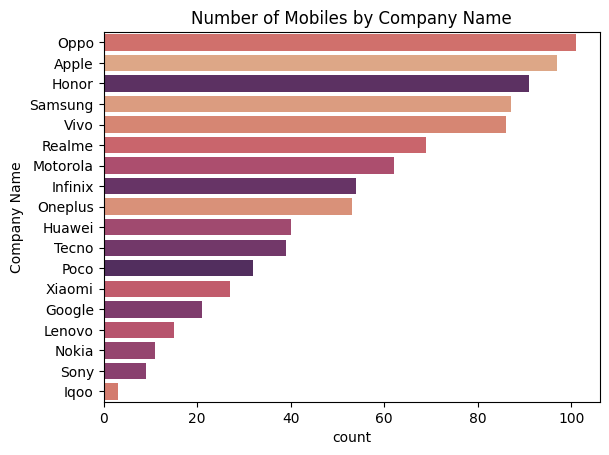

In [223]:
# Countplot
sns.countplot(data=df,y='Company Name',palette='flare',
              hue='Company Name',
                order=df['Company Name'].value_counts().index)
plt.title('Number of Mobiles by Company Name')
plt.show()

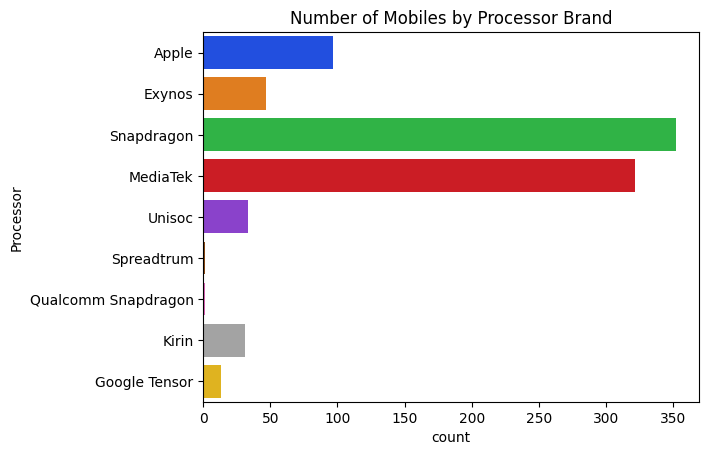

In [224]:
sns.countplot(data=df, y='Processor', hue='Processor', palette='bright')
plt.title('Number of Mobiles by Processor Brand')
plt.show()

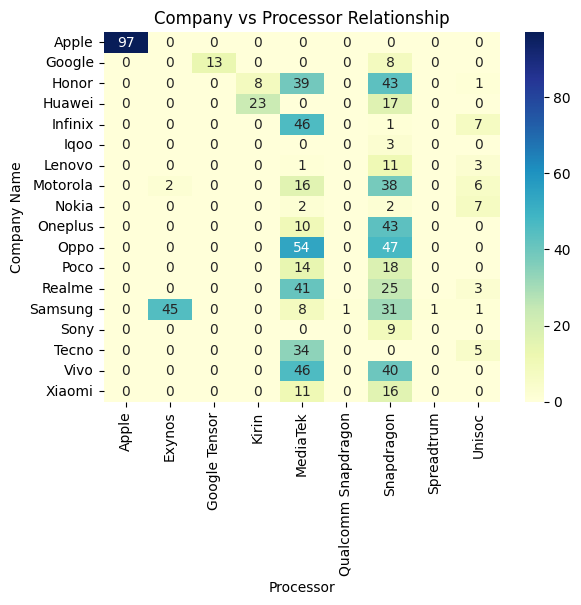

In [225]:
# Comparison Heatmap of Company Name vs Processor
sns.heatmap(pd.crosstab(df['Company Name'],df['Processor']), annot=True,
            cmap='YlGnBu')
plt.title('Company vs Processor Relationship')
plt.show()

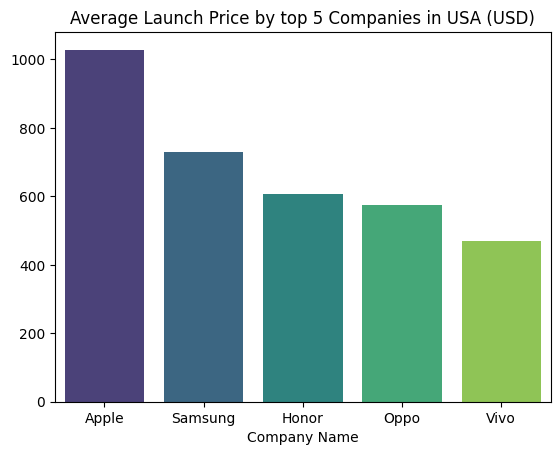

In [226]:
top_5mobiles = df['Company Name'].value_counts().head(5).index
avg_price_top5 = df[df['Company Name'].isin(top_5mobiles)]
avg_price = avg_price_top5.groupby('Company Name')['Launched Price (USA USD)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis',hue=avg_price.index)
plt.title('Average Launch Price by top 5 Companies in USA (USD)')
plt.show()

In [227]:
price_cols

['Launched Price (Pakistan USD)',
 'Launched Price (India USD)',
 'Launched Price (China USD)',
 'Launched Price (USA USD)',
 'Launched Price (Dubai USD)']

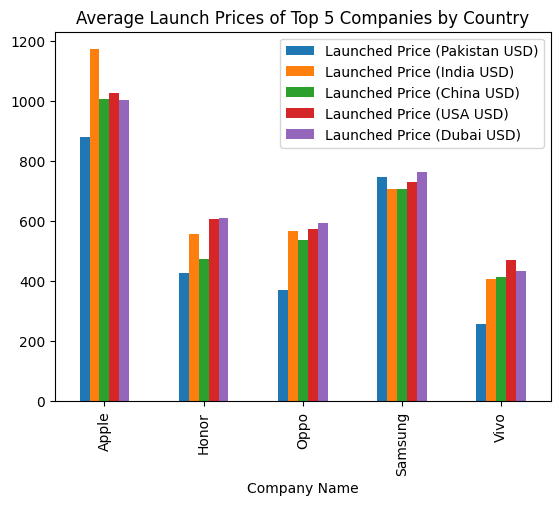

In [228]:
# write code to compare average prices of
# top 5 company mobiles according to each country
price_cols = [
    'Launched Price (Pakistan USD)',
    'Launched Price (India USD)',
    'Launched Price (China USD)',
    'Launched Price (USA USD)',
    'Launched Price (Dubai USD)'
]
top_5_companies = df['Company Name'].value_counts().head(5).index
avg_price_top5 = df[df['Company Name'].isin(top_5_companies)].groupby('Company Name')[price_cols].mean()
avg_price_top5.plot(kind='bar')
plt.title('Average Launch Prices of Top 5 Companies by Country')
plt.show()

In [161]:
df.head(5)

,Company Name,Model Name,Mobile Weight (gram),RAM (GB),Front Camera Main (MP),Back Camera Main (MP),Processor,Battery Capacity (mAh),Screen Size (inch),Launched Price (Pakistan USD),Launched Price (India USD),Launched Price (China USD),Launched Price (USA USD),Launched Price (Dubai USD),Launched Year
0,Apple,iPhone 16 128GB,174.0,6.0,12.0,48.0,Apple,3600,6.1,800.0,910.0,814.0,799.0,762.0,2024
1,Apple,iPhone 16 256GB,174.0,6.0,12.0,48.0,Apple,3600,6.1,836.0,967.0,856.0,849.0,817.0,2024
2,Apple,iPhone 16 512GB,174.0,6.0,12.0,48.0,Apple,3600,6.1,871.0,1024.0,912.0,899.0,871.0,2024
3,Apple,iPhone 16 Plus 128GB,203.0,6.0,12.0,48.0,Apple,4200,6.7,889.0,1024.0,870.0,899.0,871.0,2024
4,Apple,iPhone 16 Plus 256GB,203.0,6.0,12.0,48.0,Apple,4200,6.7,925.0,1081.0,912.0,949.0,926.0,2024


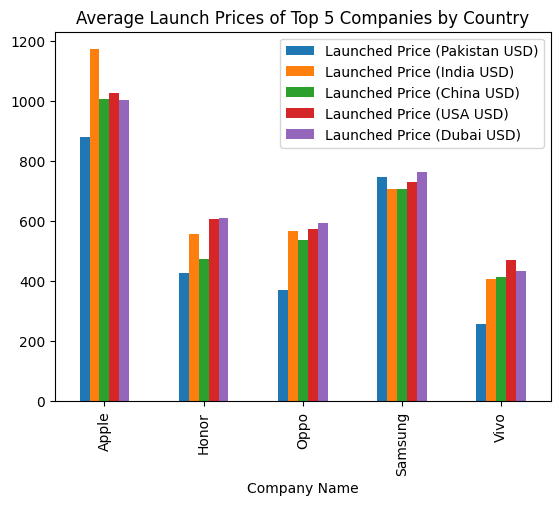

In [ ]:
# write code to compare average prices of
# top 5 company mobiles according to each country
price_cols = [
    'Launched Price (Pakistan USD)',
    'Launched Price (India USD)',
    'Launched Price (China USD)',
    'Launched Price (USA USD)',
    'Launched Price (Dubai USD)'
]
top_5_companies = df['Company Name'].value_counts().head(5).index
avg_price_top5 = df[df['Company Name'].isin(top_5_companies)].groupby('Company Name')[price_cols].mean()
avg_price_top5.plot(kind='bar')
plt.title('Average Launch Prices of Top 5 Companies by Country')
plt.show()

# 📊 Key Insights from Mobile Dataset (After EDA)

---

## 🏢 Company Insights
- 🟩 **Oppo** has launched the **most smartphones**.  
- 🟥 **iQOO** has launched the **fewest smartphones**.  
- 🏆 **Top 5 brands:** **Oppo, Samsung, Vivo, Xiaomi,** and **Apple**.

---

## ⚙️ Processor Insights
- 🔸 **Snapdragon** and **MediaTek** are the **most widely used processors**.  
- 🍎 **Apple Bionic**, 🪶 **Exynos**, and 🤖 **Google Tensor** are **used only by their own brands**.  
- 🔁 **Kirin**, **MediaTek**, **Unisoc**, and **Snapdragon** are **shared across multiple brands**.

---

## 💵 Price Insights (Across Countries)
- 💰 Among **top 5 companies**, **Apple** has the **highest average price**, while **Vivo** has the **lowest**, in the **USA**.  
- 🇮🇳 **Apple:** highest price in **India**, lowest in **Pakistan**.  
- 🇦🇪 **Honor:** highest price in **Dubai**, lowest in **Pakistan**.  
- 📱 **Samsung:** highest price in **Dubai**, lowest in **Pakistan**.  
- 🇺🇸 **Vivo:** highest price in **USA**, lowest in **Pakistan**.

---

## 💡 Summary
- 🏅 **Oppo** leads in the number of models.  
- 💎 **Apple** leads in premium pricing.  
- ⚙️ **Snapdragon** and **MediaTek** dominate mobile processors.  
- 🌍 **Pakistan** consistently shows the **lowest launch prices** across brands.

---